# IMPORTING LIBRARY

In [324]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from faker import Faker
import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATA

In [292]:
data=pd.read_excel("palm data cluster.xlsx")

In [293]:
data.head()

,Division,Block,Area,Empty Fruit Brunch,Production,Achievement Percentage
0,1,1.A,3,810,3260,0.8412
1,1,1.B,2,569,2000,0.7194
2,1,1.C,2,545,2140,0.8307
3,1,1.D,2,480,1200,0.7500
4,1,1.E,2,465,1180,0.5897


In [294]:
data.describe()

,Division,Area,Empty Fruit Brunch,Production,Achievement Percentage
count,16.000000,16.0000,16.000000,16.0000,16.000000
mean,1.437500,2.0625,490.687500,1706.2500,0.762713
std,0.512348,0.2500,118.790414,540.1219,0.099353
min,1.000000,2.0000,280.000000,1100.0000,0.589700
25%,1.000000,2.0000,444.500000,1330.0000,0.712175
50%,1.000000,2.0000,480.000000,1620.0000,0.760550
75%,2.000000,2.0000,549.500000,1925.0000,0.841600
max,2.000000,3.0000,810.000000,3260.0000,0.924300


# DATA MANIPULATION

Adding the observation to 300

In [295]:
fake=Faker()

In [296]:
add_samples=300

In [297]:
rng = np.random.default_rng()

In [298]:
add_data={
    'Division' : [fake.random_int(min=1, max=3) for _ in range(add_samples)],
    'Block' : [fake.name() for _ in range(add_samples)]
    #'Area' : [fake.random_int(min=1, max=3) for _ in range(add_samples)]
}

In [299]:
#Area = np.rint(rng.normal(loc=2.0625, scale=1, size=300)).astype(int)
Area = np.abs(np.random.normal(loc=2, scale=1, size=300))
Empty_Fruit_Brunch = np.rint(rng.normal(loc=490, scale=118, size=300)).astype(int)
Production = np.rint(rng.normal(loc=1706.2500, scale=540.1219, size=300)).astype(int)
Achievement_Percentage = np.random.normal(loc=0.762713, scale=0.099353, size=300)

In [300]:
additional=pd.DataFrame({
    'Division' : add_data['Division'],
    'Block' : add_data['Block'],
    #'Area' : add_data['Area'],
    'Area' : Area,
    'Empty Fruit Brunch' : Empty_Fruit_Brunch,
    'Production' : Production,
    'Achievement Percentage' : Achievement_Percentage
})

In [301]:
additional.head()

,Division,Block,Area,Empty Fruit Brunch,Production,Achievement Percentage
0,1,Noah Reeves,3.398023,403,457,0.826510
1,2,Kim Calderon,1.963708,450,1469,0.695665
2,3,John Hamilton,1.740662,599,1943,0.713781
3,3,Todd Robertson,0.900932,612,2372,0.854421
4,1,Laura Hancock,3.415912,447,956,0.914565


In [302]:
df= pd.concat([data, pd.DataFrame(additional)], ignore_index=True)

In [303]:
df.head()

,Division,Block,Area,Empty Fruit Brunch,Production,Achievement Percentage
0,1,1.A,3.0,810,3260,0.8412
1,1,1.B,2.0,569,2000,0.7194
2,1,1.C,2.0,545,2140,0.8307
3,1,1.D,2.0,480,1200,0.7500
4,1,1.E,2.0,465,1180,0.5897


In [304]:
df.describe()

,Division,Area,Empty Fruit Brunch,Production,Achievement Percentage
count,316.000000,316.000000,316.000000,316.000000,316.000000
mean,1.927215,2.081258,488.496835,1699.870253,0.761077
std,0.819070,0.914739,117.987153,557.640169,0.097950
min,1.000000,0.033125,140.000000,-5.000000,0.515685
25%,1.000000,1.463438,420.750000,1326.250000,0.692901
50%,2.000000,2.000000,485.500000,1707.500000,0.763048
75%,3.000000,2.728946,569.000000,2068.250000,0.824217
max,3.000000,4.638749,856.000000,3260.000000,1.029779


In [305]:
df['Area'].value_counts()

Area
2.000000    15
1.804346     1
1.795919     1
1.409474     1
1.979623     1
            ..
1.061702     1
0.955754     1
2.320845     1
2.373306     1
0.042130     1
Name: count, Length: 302, dtype: int64

# DATA CLEANING

In [306]:
df.duplicated().sum()

0

In [307]:
df.isnull().sum()

Division                  0
Block                     0
Area                      0
Empty Fruit Brunch        0
Production                0
Achievement Percentage    0
dtype: int64

In [308]:
df_run=df.drop(['Division', 'Block', 'Production'], axis=1)

# EDA

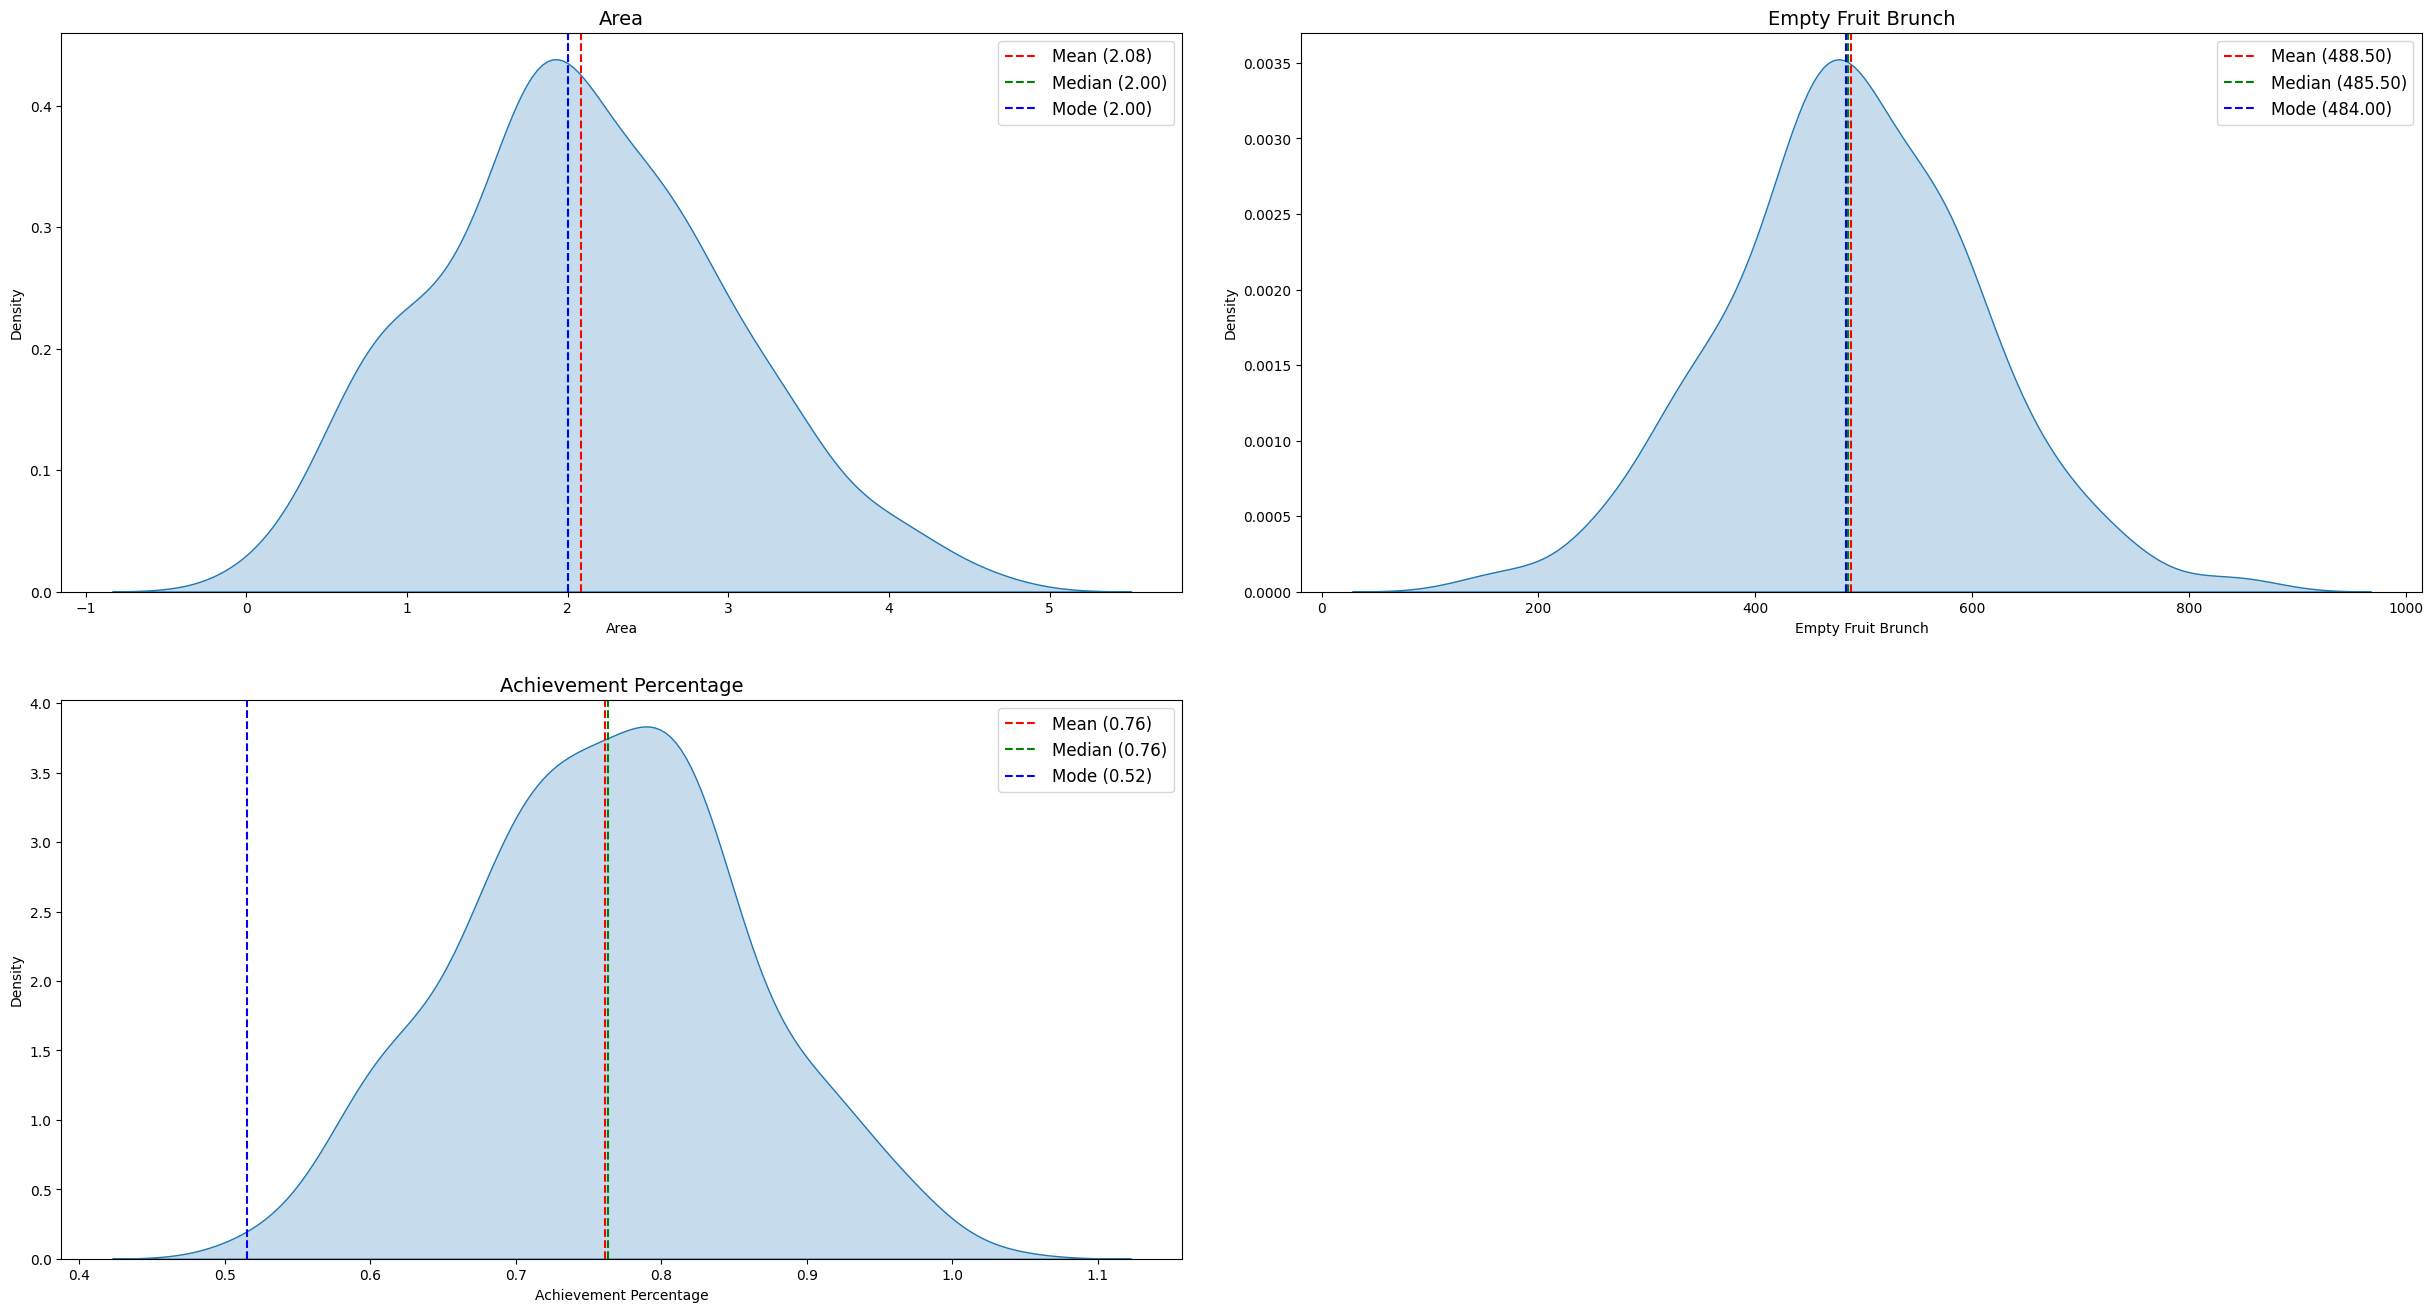

In [309]:
# Setting the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Calculating the total number of subplots
total_subplots = num_rows * num_cols

# Adjusting the figure size
plt.figure(figsize=(25, 20))

# Initializing the subplot index
subplot_index = 1

# Looping through each column to visualize the data distribution
for col in df_run.columns:
    if df_run[col].dtype != 'object':
        # Creating a subplot
        plt.subplot(num_rows, num_cols, subplot_index)
        
        # Using kdeplot to visualize the distribution
        ax = sns.kdeplot(df_run[col], shade=True)
        
        # Calculating mean, median, and mode
        mean_val = df_run[col].mean()
        median_val = df_run[col].median()
        mode_val = stats.mode(df[col])[0]
        
        # Adding lines for mean, median, and mode
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
        ax.axvline(median_val, color='green', linestyle='--', label=f'Median ({median_val:.2f})')
        ax.axvline(mode_val, color='blue', linestyle='--', label=f'Mode ({mode_val:.2f})')
        
        # Setting the title
        ax.set_title(col, fontsize=14)
        
        # Adding a legend
        plt.legend(fontsize=12)
        
        # Incrementing the subplot index
        subplot_index += 1

# Adjusting the layout of subplots for better readability
plt.tight_layout(pad=3.0)

# Showing the plot
plt.show()

<Axes: xlabel='Empty Fruit Brunch', ylabel='Achievement Percentage'>

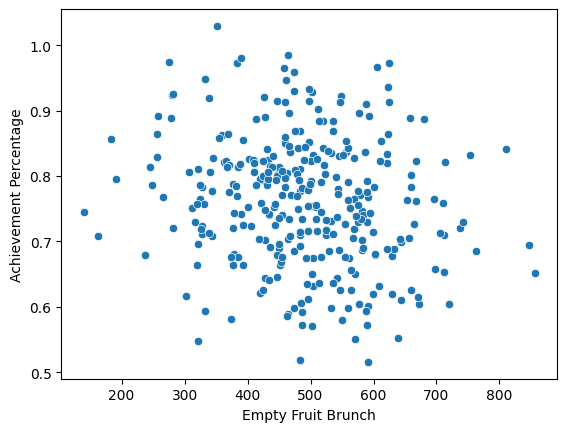

In [310]:
sns.scatterplot(x=df_run['Empty Fruit Brunch'], y=df_run['Achievement Percentage'])

# DATA PREPROCESSING

In [311]:
X = pd.DataFrame(StandardScaler().fit_transform(df_run), 
                        columns=df_run.columns)

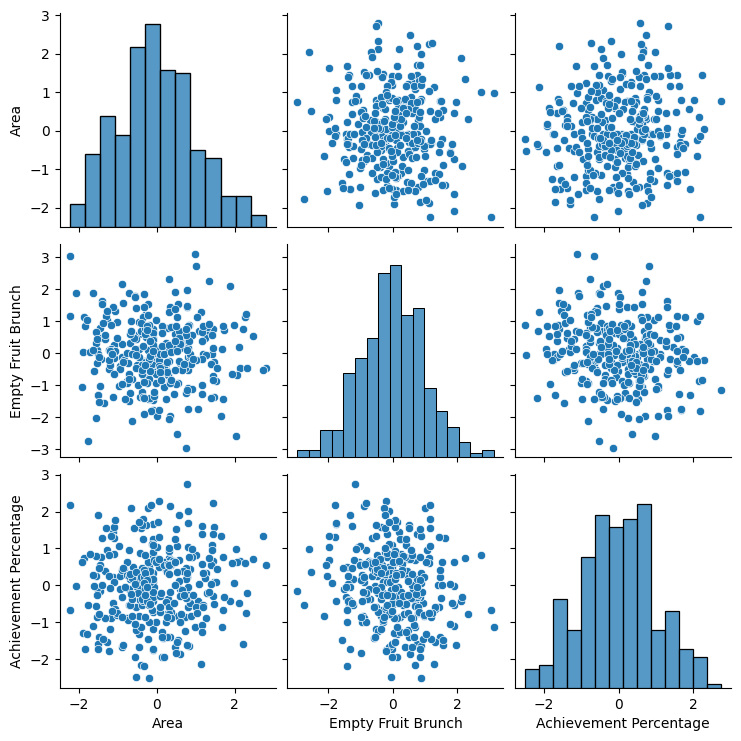

In [312]:
sns.pairplot(pd.DataFrame(X))

# DATA MODELLING

# Elbow method

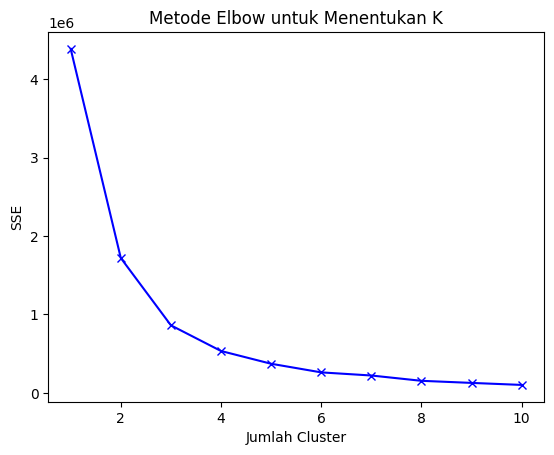

In [313]:
sse = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_run)
    sse.append(kmeans.inertia_)

plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan K')
plt.show()

In [314]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', max_iter=300, random_state=0)
    km.fit(df_run)
    distortions.append(km.inertia_)
    # Inertia is the sum of squared distances of samples to their closest cluster center.

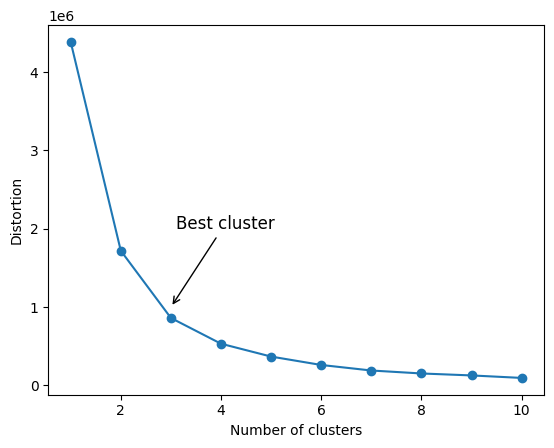

In [315]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.annotate('Best cluster', xy=(3, 1000000), xytext=(3.1, 2000000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Elbow method shows that the best K is 2 (probably 3 can be better)

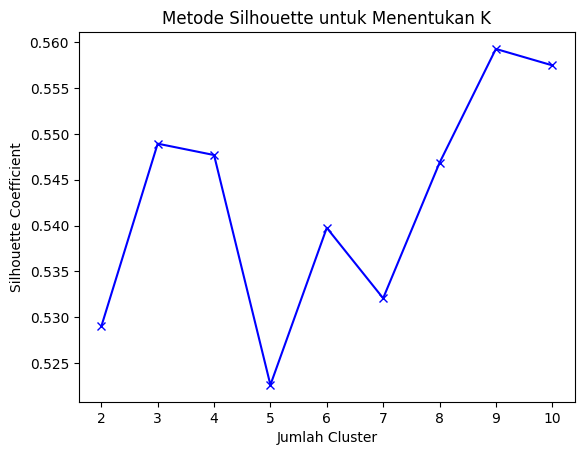

In [323]:
silhouette_scores = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_run)
    silhouette_scores.append(silhouette_score(df_run, kmeans.labels_))

plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Coefficient')
plt.title('Metode Silhouette untuk Menentukan K')
plt.show()

In [316]:
km = KMeans(n_clusters=3, init='random', max_iter=300, random_state=20)
cluster = km.fit_predict(df_run)

In [317]:
preview_cluster_data = pd.DataFrame({
    'centroid pada fitur 1 (sumbu x)':km.cluster_centers_[:,0],
    'centroid pada fitur 2 (sumbu y)':km.cluster_centers_[:,1],
    'centroid pada fitur 3 (sumbu z)':km.cluster_centers_[:,2],
    'cluster':list(range(3))
})
preview_cluster_data

,centroid pada fitur 1 (sumbu x),centroid pada fitur 2 (sumbu y),centroid pada fitur 3 (sumbu z),cluster
0,2.109774,623.557895,0.735698,0
1,2.073438,476.300654,0.767577,1
2,2.059015,327.250000,0.781907,2


In [318]:
data_with_cluster=df.copy()
data_with_cluster['cluster']=cluster
data_with_cluster

,Division,Block,Area,Empty Fruit Brunch,Production,Achievement Percentage,cluster
0,1,1.A,3.000000,810,3260,0.841200,0
1,1,1.B,2.000000,569,2000,0.719400,0
2,1,1.C,2.000000,545,2140,0.830700,1
3,1,1.D,2.000000,480,1200,0.750000,1
4,1,1.E,2.000000,465,1180,0.589700,1
...,...,...,...,...,...,...,...
311,1,Danielle Perry,2.505971,535,1288,0.884739,1
312,3,Justin Nelson,4.560747,428,2133,0.891017,1
313,2,Peter Moore,3.142131,535,2591,0.637140,1
314,3,Eric Maddox,1.855406,575,1155,0.755828,0


In [319]:
data_with_cluster['cluster'].value_counts()

cluster
1    153
0     95
2     68
Name: count, dtype: int64

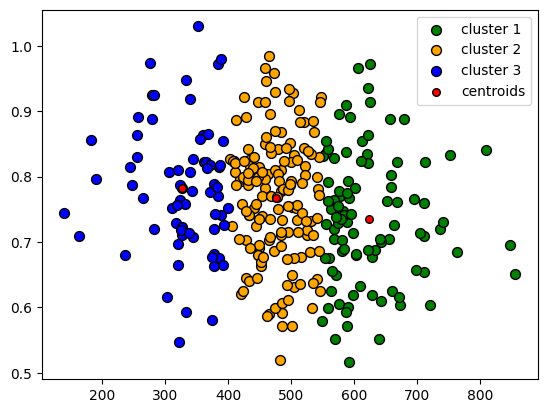

In [320]:
# plot the 3 clusters

# cluster berwarna hijau atau cluster 1
plt.scatter(
    data_with_cluster.loc[data_with_cluster['cluster'] == 0, 'Empty Fruit Brunch'], 
    data_with_cluster.loc[data_with_cluster['cluster']==0, 'Achievement Percentage'],
    s=50, c='green', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data_with_cluster.loc[data_with_cluster['cluster'] == 1, 'Empty Fruit Brunch'], 
    data_with_cluster.loc[data_with_cluster['cluster']==1, 'Achievement Percentage'],
    s=50, c='orange', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data_with_cluster.loc[data_with_cluster['cluster'] == 2, 'Empty Fruit Brunch'], 
    data_with_cluster.loc[data_with_cluster['cluster']==2, 'Achievement Percentage'],
    s=50, c='blue', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 1], km.cluster_centers_[:, 2],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

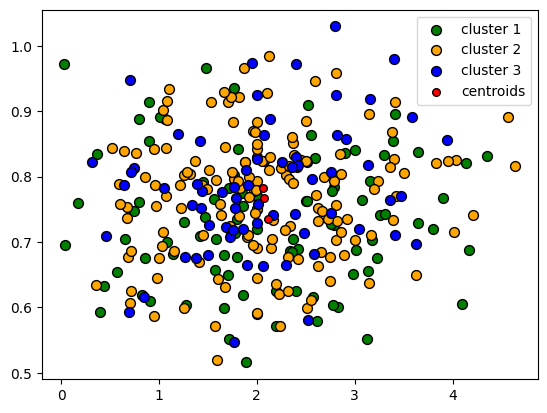

In [321]:
# plot the 3 clusters

# cluster berwarna hijau atau cluster 1
plt.scatter(
    data_with_cluster.loc[data_with_cluster['cluster'] == 0, 'Area'], 
    data_with_cluster.loc[data_with_cluster['cluster']==0, 'Achievement Percentage'],
    s=50, c='green', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data_with_cluster.loc[data_with_cluster['cluster'] == 1, 'Area'], 
    data_with_cluster.loc[data_with_cluster['cluster']==1, 'Achievement Percentage'],
    s=50, c='orange', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data_with_cluster.loc[data_with_cluster['cluster'] == 2, 'Area'], 
    data_with_cluster.loc[data_with_cluster['cluster']==2, 'Achievement Percentage'],
    s=50, c='blue', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 2],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()